**Ejemplo**  

Supongamos que trabajas como analista de datos en una empresa de servicios financieros. Quieres analizar los ingresos mensuales de los clientes actuales para entender mejor su distribución. Estos datos son importantes porque afectan el perfil de riesgo de los clientes y su capacidad para tomar préstamos o pagar productos financieros.  Se requiere los ingresos mensuales de los clientes para determinar si siguen una distribución normal y ver cómo se distribuyen alrededor de la media. También queremos identificar si la mayor parte de los clientes tienen ingresos dentro de un rango específico (por ejemplo, alrededor de la media) y si hay outliers (clientes con ingresos muy bajos o muy altos).

c:\Users\CursosTardes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


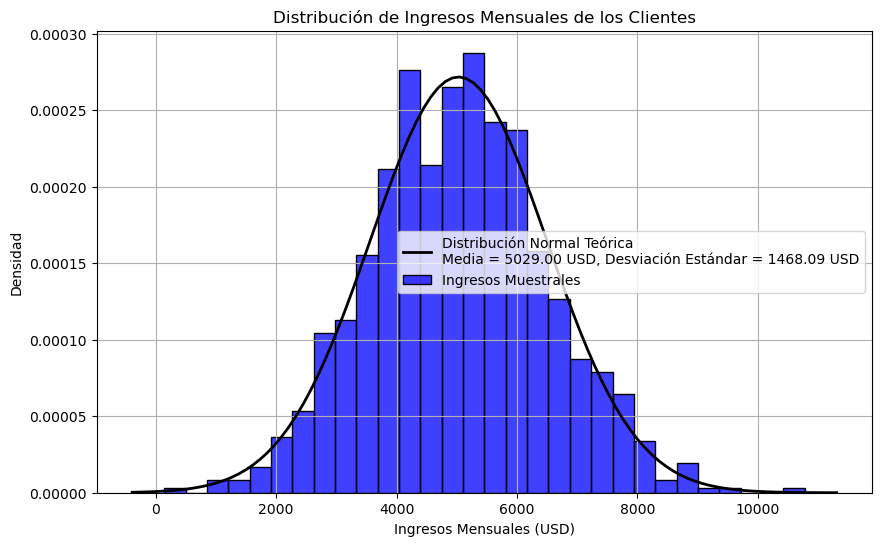

In [1]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Generar algunos datos de ejemplo (ingresos mensuales en USD de clientes)
# Suponemos que los ingresos siguen aproximadamente una distribución normal
np.random.seed(42)
income_data = np.random.normal(loc=5000, scale=1500, size=1000)  # Media = 5000 USD, Desviación estándar = 1500 USD

# Calcular la media y la desviación estándar de los ingresos generados
mean_income, std_income = np.mean(income_data), np.std(income_data)

# Crear un histograma de los datos de ingresos con un ajuste de la curva de distribución normal teórica
plt.figure(figsize=(10, 6))
sns.histplot(income_data, bins=30, kde=False, color='blue', stat='density', label="Ingresos Muestrales")
xmin, xmax = plt.xlim()

# Generar los valores de la curva de distribución normal
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_income, std_income)

# Graficar la curva de la distribución normal teórica
plt.plot(x, p, 'k', linewidth=2, label=f'Distribución Normal Teórica\nMedia = {mean_income:.2f} USD, Desviación Estándar = {std_income:.2f} USD')

# Añadir etiquetas y título
plt.title('Distribución de Ingresos Mensuales de los Clientes')
plt.xlabel('Ingresos Mensuales (USD)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()


> **Ejercicio 2.11**. Con los datos del ejemplo anterior, calcule con python la primera, segunda y la tercera desviación estandar. ¿Hay outliers en los datos?

Media: 5029.00 USD
Desviación estándar: 1468.09 USD
Rango de una desviación estándar: (3560.9087721124565, 6497.08739535452)
Rango de dos desviaciones estándar: (2092.819460491425, 7965.176706975551)
Rango de tres desviaciones estándar: (624.7301488703943, 9433.266018596581)
Cantidad de outliers detectados: 3
Outliers: [10779.09723598   138.0989899   9618.32121268]


c:\Users\CursosTardes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


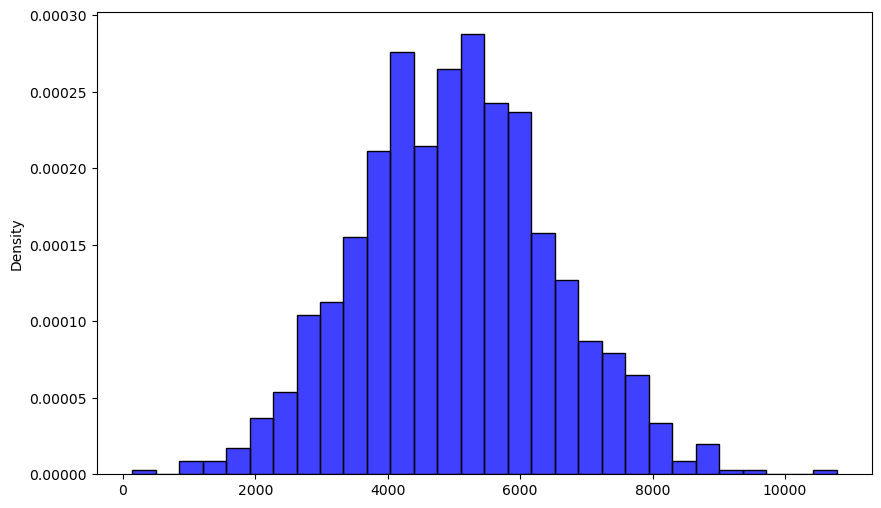

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Datos generados previamente
np.random.seed(42)
income_data = np.random.normal(loc=5000, scale=1500, size=1000)

# Calcular la media y la desviación estándar
mean_income = np.mean(income_data)
std_income = np.std(income_data)

# Calcular los límites para la primera, segunda y tercera desviación estándar
first_std_range = (mean_income - std_income, mean_income + std_income)
second_std_range = (mean_income - 2*std_income, mean_income + 2*std_income)
third_std_range = (mean_income - 3*std_income, mean_income + 3*std_income)

# Identificar outliers
outliers = income_data[(income_data < third_std_range[0]) | (income_data > third_std_range[1])]

# Mostrar resultados
print(f"Media: {mean_income:.2f} USD")
print(f"Desviación estándar: {std_income:.2f} USD")
print(f"Rango de una desviación estándar: {first_std_range}")
print(f"Rango de dos desviaciones estándar: {second_std_range}")
print(f"Rango de tres desviaciones estándar: {third_std_range}")
print(f"Cantidad de outliers detectados: {len(outliers)}")
print(f"Outliers: {outliers}")

# Graficar los datos
plt.figure(figsize=(10, 6))
sns.histplot(income_data, bins=30, kde=False, color='blue', stat='density', label="Ingresos Muestrales")
xmin, xmax = plt.xlim()




### ¿Cómo usar el modelo binomial para predecir futuras compras?

1. **Determinar el número de pruebas (clics futuros)**:  
   Primero, necesitas saber cuántos clics futuros esperas tener, ya que este será el número de pruebas en la predicción.

2. **Definir la probabilidad de éxito (p)**:  
   En este caso, la probabilidad de éxito es la tasa de conversión, que ya has calculado como \( p = 0.03 \) (3% de los clics resultan en compras).

3. **Realizar las predicciones usando la distribución binomial**:  
   Usando la distribución binomial, puedes calcular la probabilidad de observar un número determinado de compras en los clics futuros. Puedes hacerlo para cualquier número de compras, ya sea el valor más probable (esperado) o cualquier otro valor.


Imagina que quieres predecir cuántas compras podrías observar si tienes **200 clics futuros** (es decir,  n = 200) .

### > **Ejercicio 2.12** Explicar el código  .

In [ ]:
# Importar las librerías necesarias:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parámetros del modelo binomial
n_futuro = 200  # Número de clics futuros
p = 0.03  # Probabilidad de compra (tasa de conversión)

# Generar la distribución binomial para futuras compras
x_futuro = np.arange(0, n_futuro + 1)
binom_dist_futuro = binom.pmf(x_futuro, n_futuro, p)

# Valor esperado (n * p)
valor_esperado = n_futuro * p
print(f"El número esperado de compras en {n_futuro} clics es: {valor_esperado:.2f}")

# Graficar la distribución binomial de las futuras compras
plt.figure(figsize=(10, 6))
plt.bar(x_futuro, binom_dist_futuro, color='green', alpha=0.6)
plt.title('Distribución Binomial: Predicción de Compras en 200 Clics (p = 0.03)', fontsize=14)
plt.xlabel('Número de Compras', fontsize=12)
plt.ylabel('Probabilidad', fontsize=12)
plt.grid(True)
plt.show()


numpy (np): Se utiliza para manejar arreglos numéricos.

matplotlib.pyplot (plt): Sirve para generar gráficos y visualizaciones.

scipy.stats.binom: Es una función de la biblioteca scipy que permite trabajar con distribuciones binomiales.

2. Parámetros del modelo binomial:
 
n_futuro = 200  # Número de clics futuros

p = 0.03  # Probabilidad de compra (tasa de conversión)

n_futuro = 200: Representa el número total de eventos futuros, en este caso, 200 clics en total.

p = 0.03: Es la probabilidad de éxito de un evento, o sea, la probabilidad de que ocurra una compra en cada clic, que es del 3% (tasa de conversión).

3. Generar la distribución binomial para futuras compras:

x_futuro = np.arange(0, n_futuro + 1)

binom_dist_futuro = binom.pmf(x_futuro, n_futuro, p)

x_futuro = np.arange(0, n_futuro + 1): Se genera un arreglo x_futuro con todos los posibles valores de compras, que van desde 0 hasta 200.

binom.pmf(x_futuro, n_futuro, p): Esta función calcula la función de masa de probabilidad (PMF) de la distribución binomial, que nos da la probabilidad de tener un número específico de compras entre 0 y 200. El resultado es un arreglo que representa la distribución de probabilidad para cada número de compras posibles.

4. Cálculo del valor esperado:
 
valor_esperado = n_futuro * p

print(f"El número esperado de compras en {n_futuro} clics es: {valor_esperado:.2f}")

valor_esperado = n_futuro * p: El valor esperado de una distribución binomial se calcula multiplicando el número de eventos (clics) por la probabilidad de éxito (tasa de conversión). En este caso, se espera tener 200 * 0.03 = 6 compras.

print(f"El número esperado de compras en {n_futuro} clics es: {valor_esperado:.2f}"): Se imprime el número esperado de compras, que es aproximadamente 6.

5. Graficar la distribución binomial de las futuras compras:

plt.figure(figsize=(10, 6))

plt.bar(x_futuro, binom_dist_futuro, color='green', alpha=0.6)

plt.title('Distribución Binomial: Predicción de Compras en 200 Clics (p = 0.03)', fontsize=14)

plt.xlabel('Número de Compras', fontsize=12)

plt.ylabel('Probabilidad', fontsize=12)

plt.grid(True)

plt.show()

plt.figure(figsize=(10, 6)): Se establece el tamaño de la figura (ancho = 10, alto = 6).

plt.bar(x_futuro, binom_dist_futuro, color='green', alpha=0.6): Se crea un gráfico de barras que muestra la probabilidad de cada número de compras posibles. El color de las barras es verde, con un nivel de transparencia (alpha) de 0.6.

plt.title(...), plt.xlabel(...), plt.ylabel(...): Estos comandos configuran el título del gráfico y las etiquetas de los ejes.

plt.grid(True): Activa la cuadrícula en el gráfico para facilitar la visualización.

plt.show(): Muestra el gráfico generado.

#### > **Ejercicio 2.13**. Investigar las aplicaciones de las distribuciones: Chi-cuadrado, F, Poisson y  Weibull en Data Science. Para cada distribución desarrolle un ejemplo con scipy o stastmodels. 

1. Distribución Chi-cuadrado

Aplicación:

La distribución Chi-cuadrado se utiliza principalmente en la prueba de hipótesis, específicamente para pruebas de ajuste de modelos (como la prueba de bondad de ajuste y la prueba de independencia). Es útil para comparar distribuciones observadas y esperadas o para analizar la independencia entre variables categóricas.

Ejemplo: Prueba de bondad de ajuste

Aquí utilizamos una prueba de bondad de ajuste para verificar si los datos siguen una distribución específica, en este caso, una distribución normal.

In [6]:
import numpy as np
from scipy.stats import chisquare

# Generar datos observados de una distribución normal
observed_data = np.random.normal(loc=5, scale=2, size=100)

# Contar las frecuencias observadas
observed_freq, _ = np.histogram(observed_data, bins=10)

# Suponemos que la distribución esperada sigue una distribución normal
expected_freq = np.ones_like(observed_freq) * np.mean(observed_freq)

# Realizamos la prueba Chi-cuadrado
chi_stat, p_value = chisquare(observed_freq, f_exp=expected_freq)

print(f'Estadístico Chi-cuadrado: {chi_stat}')
print(f'Valor p: {p_value}')


Estadístico Chi-cuadrado: 52.2
Valor p: 4.1432257984428516e-08


2. Distribución F

Aplicación:

La distribución F se utiliza principalmente en la ANOVA (Análisis de Varianza) y en la regresión lineal múltiple. Permite comparar la variabilidad entre diferentes grupos para evaluar si las medias son significativamente diferentes.

Ejemplo: Prueba F en ANOVA

Se realiza un análisis ANOVA para comparar si las medias de tres grupos son significativamente diferentes.

In [7]:
import numpy as np
from scipy.stats import f_oneway

# Generar datos de tres grupos diferentes
group1 = np.random.normal(5, 1, 100)
group2 = np.random.normal(5.5, 1, 100)
group3 = np.random.normal(6, 1, 100)

# Realizamos la prueba F para comparar las medias
f_stat, p_value = f_oneway(group1, group2, group3)

print(f'Estadístico F: {f_stat}')
print(f'Valor p: {p_value}')


Estadístico F: 17.358730807781537
Valor p: 7.417118449488887e-08


3. Distribución Poisson

Aplicación:

La distribución de Poisson se utiliza para modelar eventos que ocurren con una tasa constante en un intervalo de tiempo o espacio, como por ejemplo el número de clics por segundo en un sitio web o la llegada de clientes a una tienda.

Ejemplo: Modelo de Poisson para conteo de eventos

En este ejemplo, modelamos la llegada de clientes a una tienda por hora usando la distribución de Poisson.

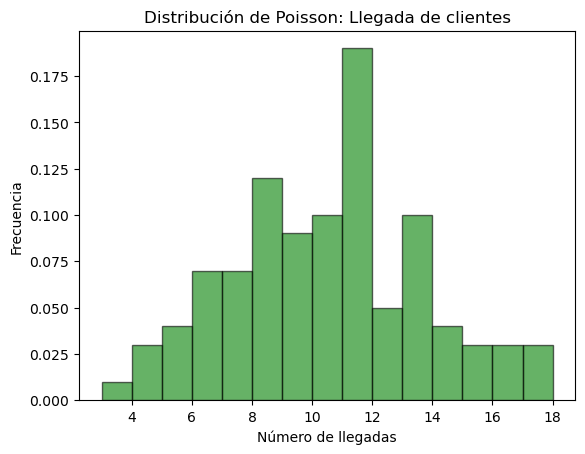

In [8]:
import numpy as np
from scipy.stats import poisson

# Definir el número esperado de llegadas de clientes por hora
lambd = 10  # tasa promedio de 10 clientes por hora

# Generar una muestra de datos de Poisson
data_poisson = poisson.rvs(mu=lambd, size=100)

# Graficar la distribución
import matplotlib.pyplot as plt
plt.hist(data_poisson, bins=15, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title("Distribución de Poisson: Llegada de clientes")
plt.xlabel("Número de llegadas")
plt.ylabel("Frecuencia")
plt.show()


4. Distribución Weibull

Aplicación:

La distribución de Weibull es ampliamente utilizada en el análisis de confiabilidad y en el análisis de tiempos de vida. Se utiliza para modelar la duración de vida de productos o el tiempo hasta el fallo de un componente.

Ejemplo: Modelo de tiempo de fallo

Modelamos el tiempo hasta el fallo de un producto usando la distribución de Weibull.

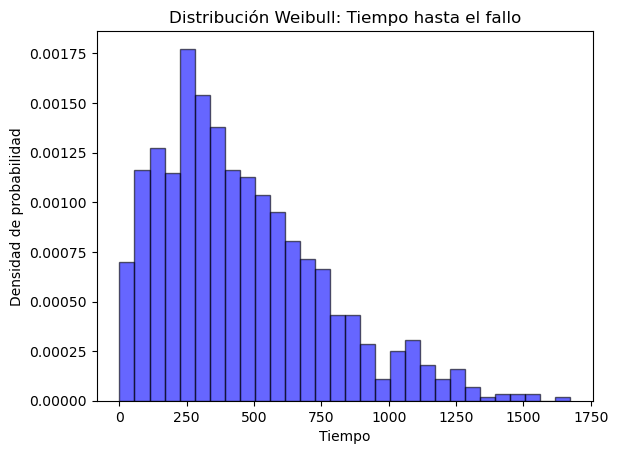

In [9]:
from scipy.stats import weibull_min
import numpy as np

# Parámetros de la distribución Weibull
shape_param = 1.5  # parámetro de forma (beta)
scale_param = 500  # parámetro de escala (lambda)

# Generar datos de la distribución Weibull
weibull_data = weibull_min.rvs(shape_param, scale=scale_param, size=1000)

# Graficar la distribución Weibull
plt.hist(weibull_data, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
plt.title("Distribución Weibull: Tiempo hasta el fallo")
plt.xlabel("Tiempo")
plt.ylabel("Densidad de probabilidad")
plt.show()


#### **Ejercicio 2.14**

En una tienda de tecnología, se registran los siguientes datos sobre la **preferencia de sistema operativo** entre hombres y mujeres:

| Género  | Windows | MacOS | Linux | Total |
|---------|---------|-------|-------|-------|
| Hombre  |   60    |   30  |   10  |  100  |
| Mujer   |   40    |   35  |   5   |   80  |
| **Total**|  100    |   65  |   15  |  180  |

Realiza una prueba chi-cuadrado para verificar si hay una relación significativa entre el **género** y la **preferencia de sistema operativo**. ¿Es significativa la relación entre estas dos variables? Usa **Python** para resolver el ejercicio y grafica los resultados obtenidos.


Estadístico Chi-cuadrado: 3.8769
Valor p: 0.1439
Grados de libertad: 2
Frecuencias esperadas:
 [[55.55555556 36.11111111  8.33333333]
 [44.44444444 28.88888889  6.66666667]]
No se encontró una relación significativa entre género y preferencia de sistema operativo.


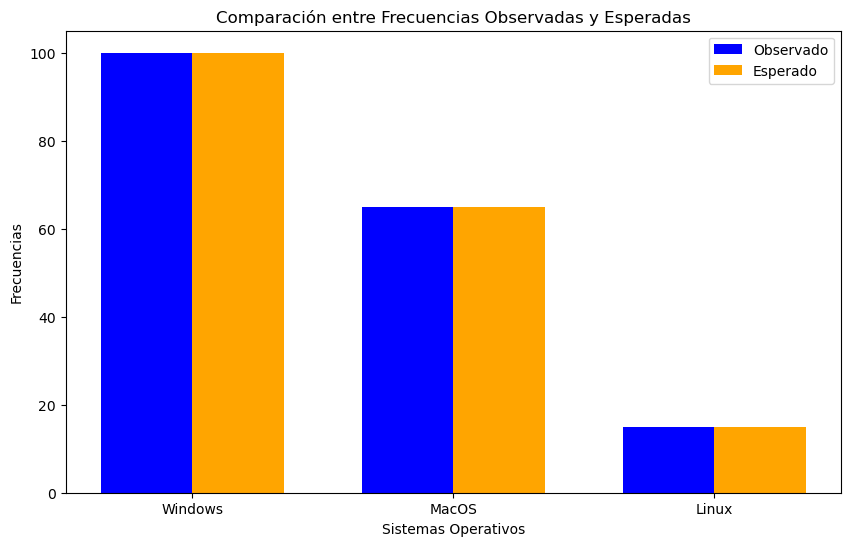

In [10]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# Crear la tabla de contingencia
data = np.array([[60, 30, 10], [40, 35, 5]])

# Realizar la prueba chi-cuadrado
chi2_stat, p_value, dof, expected = chi2_contingency(data)

# Resultados
print(f"Estadístico Chi-cuadrado: {chi2_stat:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:\n", expected)

# Evaluar si la relación es significativa
alpha = 0.05
if p_value < alpha:
    print("La relación entre género y preferencia de sistema operativo es significativa.")
else:
    print("No se encontró una relación significativa entre género y preferencia de sistema operativo.")

# Graficar los resultados observados y esperados
labels = ['Windows', 'MacOS', 'Linux']
observed_totals = data.sum(axis=0)
expected_totals = expected.sum(axis=0)

# Graficar
plt.figure(figsize=(10,6))
x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, observed_totals, width, label='Observado', color='blue')
plt.bar(x + width/2, expected_totals, width, label='Esperado', color='orange')

plt.xlabel('Sistemas Operativos')
plt.ylabel('Frecuencias')
plt.title('Comparación entre Frecuencias Observadas y Esperadas')
plt.xticks(x, labels)
plt.legend()

plt.show()


Interpretación:

El valor p es 0.144, lo que significa que no es menor a 0.05 (el nivel de significancia comúnmente utilizado). Por lo tanto, no hay evidencia suficiente para concluir que existe una relación significativa entre el género y la preferencia de sistema operativo.

En el gráfico mostrado, las barras comparan las frecuencias observadas con las frecuencias esperadas. Aunque hay diferencias entre los valores, estas no son lo suficientemente grandes como para ser consideradas estadísticamente significativas. ​

#### **Ejercicio 2.15**   

Imagina que realizas un estudio similar, pero esta vez comparando cuatro grupos de estudiantes con diferentes metodologías:  
- Grupo 1 (Método Tradicional): [55, 60, 58, 62, 59]
- Grupo 2 (Método Visual): [65, 68, 64, 69, 66]
- Grupo 3 (Método Innovador): [75, 78, 76, 79, 77]
- Grupo 4 (Método Basado en Proyectos): [85, 88, 86, 89, 87]

Pregunta:

¿Hay diferencias significativas en el rendimiento académico entre los cuatro grupos? Interpretar el siginificado del valor de F y p. Interpreta el gráfico también. Elabore conclusiones y recomendaciones.

Estadístico F: 189.6833333333333
Valor p: 1.0318561727763093e-12


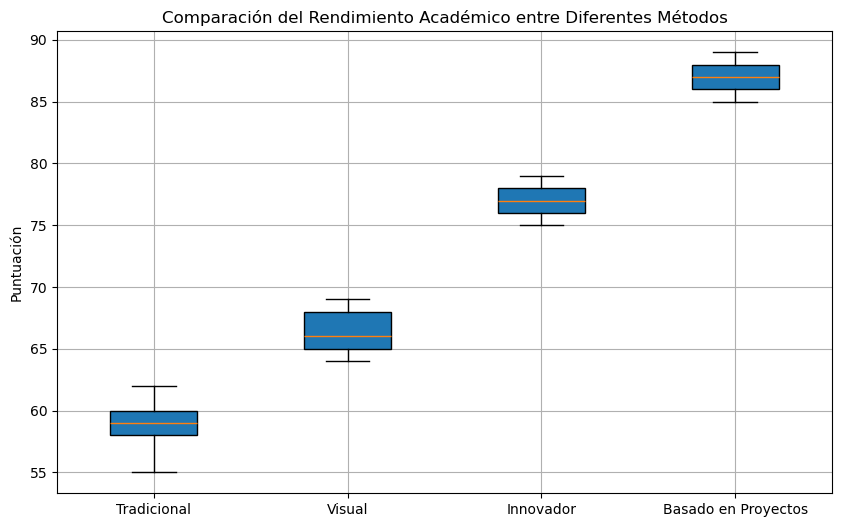

In [11]:
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

# Datos de los cuatro grupos
grupo1 = [55, 60, 58, 62, 59]  # Método Tradicional
grupo2 = [65, 68, 64, 69, 66]  # Método Visual
grupo3 = [75, 78, 76, 79, 77]  # Método Innovador
grupo4 = [85, 88, 86, 89, 87]  # Método Basado en Proyectos

# Realizar el ANOVA
f_stat, p_value = f_oneway(grupo1, grupo2, grupo3, grupo4)

# Mostrar los resultados
print(f"Estadístico F: {f_stat}")
print(f"Valor p: {p_value}")

# Crear una gráfica de caja (boxplot) para visualizar la distribución de los grupos
data = [grupo1, grupo2, grupo3, grupo4]
labels = ['Tradicional', 'Visual', 'Innovador', 'Basado en Proyectos']

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels, patch_artist=True)
plt.title('Comparación del Rendimiento Académico entre Diferentes Métodos')
plt.ylabel('Puntuación')
plt.grid(True)
plt.show()


Resultados del ANOVA:

Estadístico F: 189.68

Valor p: 
1.03
×
1
0
−
12
1.03×10 
−12
 , que es un valor extremadamente pequeño.

Interpretación:

El valor p es mucho menor que el nivel de significancia comúnmente utilizado de 0.05. Esto indica que existen diferencias significativas en el rendimiento académico entre los cuatro grupos. Por lo tanto, podemos rechazar la hipótesis nula y concluir que al menos uno de los grupos tiene un rendimiento significativamente diferente de los demás.

Gráfico:

El gráfico de cajas (boxplot) muestra la distribución de los puntajes para cada grupo. En el gráfico se observa claramente cómo las puntuaciones de los grupos tienden a aumentar a medida que se avanza hacia métodos más innovadores y basados en proyectos. El grupo con el "Método Basado en Proyectos" presenta los puntajes más altos, seguido por el "Método Innovador", "Método Visual" y finalmente el "Método Tradicional" con los puntajes más bajos.

Conclusión:

El análisis ANOVA sugiere que los diferentes métodos de enseñanza influyen de manera significativa en el rendimiento académico. Con base en estos resultados, se podría recomendar la implementación de métodos más innovadores o basados en proyectos para mejorar el rendimiento de los estudiantes